This script is used to test the modules.

In [1]:
%matplotlib inline
%timeit
! pwd

import sys
#sys.path.insert(0, '/home/yang/NLeSC/Computation_Modeling/Bjerknes/Scripts/META/meta')
#sys.path.append("../")
import numpy as np
from netCDF4 import Dataset
import matplotlib
import matplotlib.pyplot as plt
import os
import statistics

/home/yang/NLeSC/Computation_Modeling/Bjerknes/Scripts/META/meta


(456, 241, 480)
The input data does not have the dimension of month.
The output anomaly time series only contains one dimension for time!


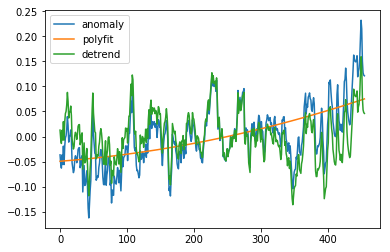

In [2]:
if __name__=="__main__":
    # sample
    datapath_ERAI_fields = '/home/yang/workbench/Core_Database_AMET_OMET_reanalysis/ERAI/regression'
    dataset_ERAI_fields_SIC_SST_SLP = Dataset(datapath_ERAI_fields + os.sep + 'surface_ERAI_monthly_regress_1979_2016.nc')
    SST_ERAI_series = dataset_ERAI_fields_SIC_SST_SLP.variables['sst'][:]
    time_ERAI = dataset_ERAI_fields_SIC_SST_SLP.variables['time'][:]
    SST_ERAI_mask = np.ma.getmaskarray(SST_ERAI_series[0,:,:])
    SST_ERAI_mask_3D = np.repeat(SST_ERAI_mask[np.newaxis,:,:],len(time_ERAI),0)
    SST_ERAI_series[SST_ERAI_mask_3D==True] = 0
    del SST_ERAI_mask_3D
    print (SST_ERAI_series.shape)
    SST_mean = np.mean(np.mean(SST_ERAI_series,2),1)
    instance = statistics.operator(SST_mean)
    instance.anomaly(Dim_month=False) # input doesn't have dimension [month]
    instance.detrend()
    plt.plot(instance._anomaly,label='anomaly')
    plt.plot(instance._polyfit,label='polyfit')
    plt.plot(instance._detrend,label='detrend')
    plt.legend()
    